<a href="https://colab.research.google.com/github/JoanHTey/TFG/blob/main/R_localization_TFGv0.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def build_supra_adjacency_matrix(A_1, A_2, p, gamma):
    n = A_1.shape[0]

    # Create the off-diagonal blocks
    identity_block = np.eye(n)
    off_diagonal_block1 = p * identity_block
    off_diagonal_block2 = p * identity_block

    # Construct the final 2Nx2N matrix
    top_row = np.hstack((A_1, off_diagonal_block1))
    bottom_row = np.hstack((off_diagonal_block2, A_2))
    result_matrix = np.vstack((top_row, bottom_row))

    return result_matrix

In [3]:
def build_supra_contact_matrix(A_1, A_2, p, gamma):
    n = A_1.shape[0]

    # Calculate row sums
    k_1 = np.sum(A_1, axis=1)
    k_2 = np.sum(A_2, axis=1)
    #print(k_1)
    #print(k_2)

    # Calculate diagonal blocks
    R_1 = 1 - np.power(1 - A_1 / k_1[:, np.newaxis], gamma)
    R_2 = 1 - np.power(1 - A_2 / k_2[:, np.newaxis], gamma)

    # Create the off-diagonal blocks
    identity_block = np.eye(n)
    off_diagonal_block1 = p * identity_block
    off_diagonal_block2 = p * identity_block

    # Construct the final 2Nx2N matrix
    top_row = np.hstack((R_1, off_diagonal_block1))
    bottom_row = np.hstack((off_diagonal_block2, R_2))
    result_matrix = np.vstack((top_row, bottom_row))

    return result_matrix

In [4]:
def leading_eigenvector(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)

    # Find the index of the leading eigenvalue
    leading_index = np.argmax(eigenvalues)

    # Extract the leading eigenvector
    leading_eigenvector = eigenvectors[:, leading_index]

    return leading_eigenvector, eigenvalues[leading_index]

In [5]:
def IPR(vector):
    N = len(vector) // 2
    IPR1 = sum(entry ** 4 for entry in vector[:N])
    IPR2 = sum(entry ** 4 for entry in vector[N:])
    return IPR1, IPR2

In [6]:



G1=nx.random_regular_graph(10,100)
G2=nx.random_regular_graph(8,100)
while nx.is_connected(G1)!=True:
  G1=nx.random_regular_graph(10,100)
while nx.is_connected(G2)!=True:
  G2=nx.random_regular_graph(8,100)

A_1=nx.to_numpy_array(G1)
A_2=nx.to_numpy_array(G2)

In [7]:

i1l={}
i2l={}
#v1={}

for gamma in np.logspace(0,2,20):
  i1l[gamma]=[]
  i2l[gamma]=[]
  #v1[gamma]=[]
  for p in np.logspace(-5,2,100):
    r = build_supra_contact_matrix(A_1, A_2, p, gamma)
    w,v=leading_eigenvector(r)
    i1,i2=IPR(w)
    #v1[gamma].append(v)
    i1l[gamma].append(i1)
    i2l[gamma].append(i2)

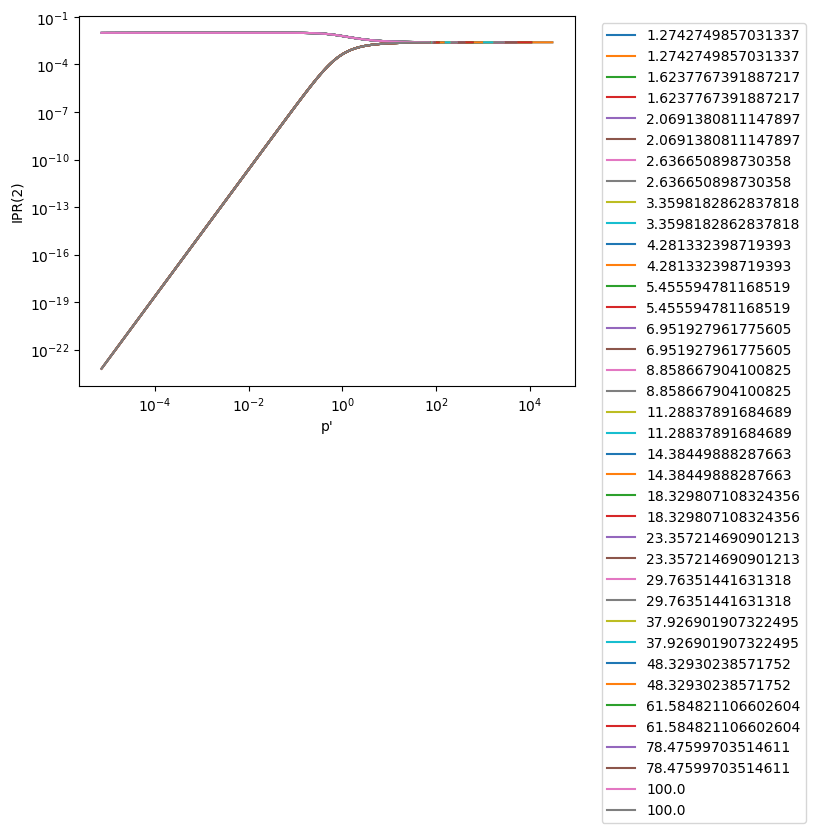

In [68]:
i=0
for gamma in np.logspace(0,2,20):
  if gamma!=1:
    plt.plot(np.logspace(-5,2,100)/Pc[i],i1l[gamma],label=gamma)
    plt.plot(np.logspace(-5,2,100)/Pc[i],i2l[gamma],label=gamma)
    i=i+1
plt.yscale('log')
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel("p'")
plt.ylabel("IPR(2)")

plt.show()

Characteritzation of the non-dominant layer in the localizated regime.

In [52]:
alpha=[]
c1=[]
c2=[]


for gamma in np.logspace(0,2,20):
    #Linear regression of the log(IPR(v2)) in function of log(p)
    c,m=np.polyfit(np.log(np.logspace(-5,2,100))[:10],np.log(i2l[gamma])[:10],1)
    cf=i2l[gamma][99]

    alpha.append(c)
    c1.append(m)
    c2.append(cf)
print(c1)

[-5.99146455073481, 16.895956970812072, 12.753125204303503, 9.768565736484971, 7.273190618053129, 5.064263368367774, 3.059316857574353, 1.2228045664330085, -0.4574628312053703, -1.9799113672055046, -3.3340983168312395, -4.504241613368601, -5.473086260595069, -6.227248481747005, -6.7645096576389925, -7.101749847064881, -7.278831857243193, -7.351552351313789, -7.373075543618031, -7.377253066018887]


In [10]:
#Obtaining p*
Pc=[]

for i in range(1,20):
  Pc.append((c2[i]/np.exp(c1[i]))**(1/alpha[i]))

print(Pc)



[0.003272134627193161, 0.009221422442288654, 0.019446561403127532, 0.0362870548755896, 0.06302930514322094, 0.10403128560414841, 0.16461431743082042, 0.25047714784080954, 0.3663423938428609, 0.5136751100576539, 0.6878053685945555, 0.8757190202633891, 1.0567326594313546, 1.2079849297365295, 1.3137465190759952, 1.3729205441242243, 1.397982338945088, 1.4054868325027046, 1.406948047242681]


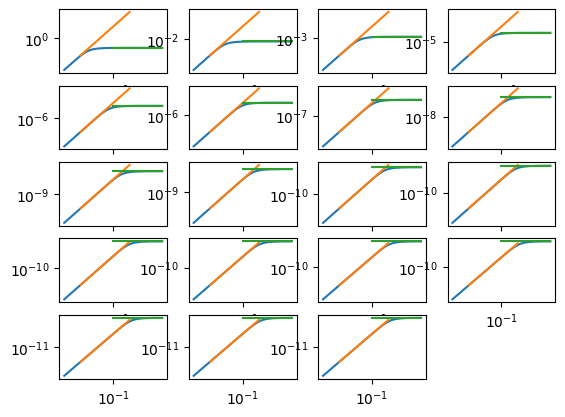

In [ ]:
i=0
x=np.linspace(0.001,1,100)
plt.figure()
for gamma in np.logspace(0,2,20):
    if gamma!=1:
        i=i+1
        plt.subplot2grid(( 5,4) ,     (((i-1)//4), (((i-1)-4*((i-1)//4)))))
        plt.plot(np.logspace(-4,2,100),i2l[gamma],label=gamma)
        plt.plot(x[:i*100],(x[:i*100])**(alpha[i])*np.exp(c1[i]))
        plt.plot(np.logspace(-1,2,2),[c2[i],c2[i]])
        #plt.plot([Pc[i-1],Pc[i-1]],np.logspace(-3,-2,2))
        #plt.axis(False)
        plt.yscale('log')
        plt.xscale('log')

plt.show()

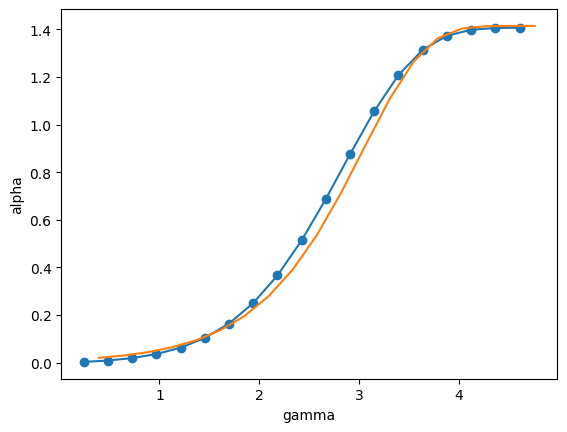

In [43]:
#Plot of alpha in function of gamma

#for gamma in np.logspace(0,2,20) :
 #  if gamma !=1:
  #    plt.plot(gamma,i2l[gamma][0],marker='o')
pp=np.zeros(19)
gma=np.zeros(19)
for i in range(0,19):
    pp[i]=np.log(Pc[i])
    gma[i]=np.log(np.logspace(0,2,20)[i+1])


plt.plot(np.log(np.logspace(0,2,20)[1:]),Pc[:],marker='o')
plt.plot(5-np.log(np.logspace(0,2,20)[1:]),2**(0.5)*(1-10**(-10/((np.logspace(0,2,20)[1:])**(1.6)))))
plt.xlabel("gamma")
plt.ylabel("Pc")
#plt.yscale('log')
#plt.xscale('log')
plt.show()


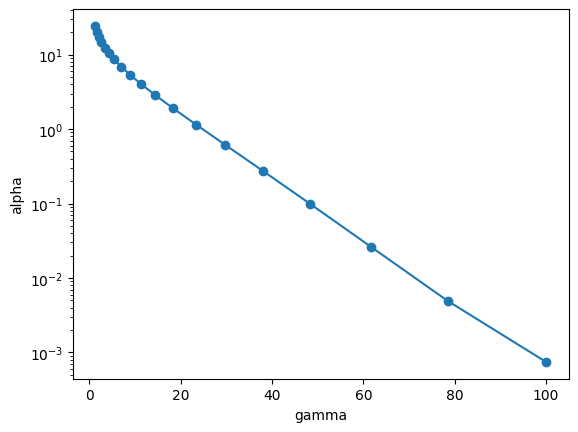

In [65]:
plt.plot(np.logspace(0,2,20)[1:],np.array(c1[1:])+7.378,marker='o')

plt.xlabel("gamma")
plt.ylabel("alpha")
plt.yscale('log')
#plt.xscale('log')
plt.show()

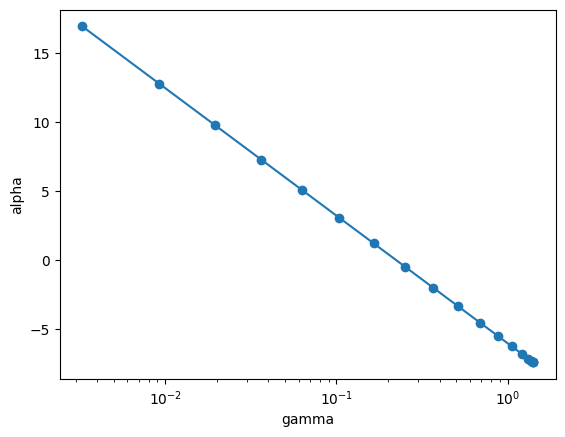

In [72]:
plt.plot(Pc[:],(c1[1:]),marker='o')

plt.xlabel("gamma")
plt.ylabel("alpha")
#plt.yscale('log')
plt.xscale('log')
plt.show()